In [1]:
import pandas as pd
import scipy.stats as stats

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Hypothesis Testing\\Costomer+OrderForm.csv")

In [3]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [5]:
df["Phillippines"].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [6]:
df["Indonesia"].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [7]:
df["Malta"].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [8]:
df["India"].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [9]:
# Data Visualisation
import matplotlib.pyplot as plt

In [10]:
def plot_stacked_bar(df):
    df_plot = df.apply(lambda x: x.value_counts()).T
    df_plot.plot(kind="bar", stacked=True)
    plt.title("Distribution of Error Free and Defective Products by Country")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.show()

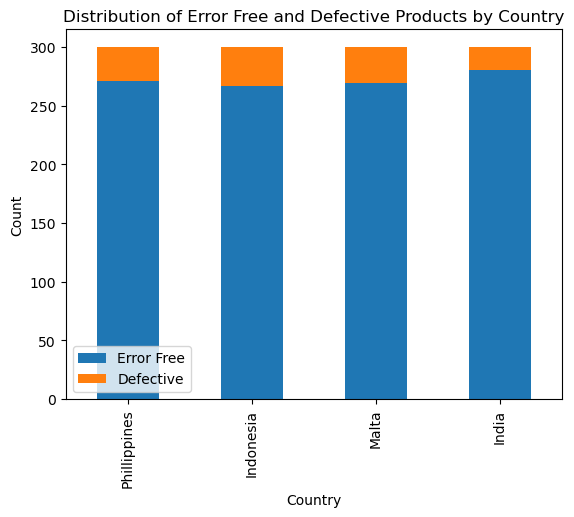

In [11]:
plot_stacked_bar(df)

In [12]:
# Creating a contingency table
# Create a contingency table

df = df.applymap(lambda x: 0 if x == 'Defective' else 1)

In [13]:
df

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,0,1
298,1,1,1,1


In [14]:
# Performing the chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = stats.chi2_contingency(df)

In [15]:
print("Chi-squared statistic :",chi2)
print("Degrees of freedom:",dof)
print("P-value:",p)
print("expected:",expected)

Chi-squared statistic : 112.74730231885849
Degrees of freedom: 897
P-value: 1.0
expected: [[0.74793008 0.73689052 0.7424103  0.77276909]
 [0.74793008 0.73689052 0.7424103  0.77276909]
 [0.49862006 0.49126035 0.4949402  0.51517939]
 ...
 [0.74793008 0.73689052 0.7424103  0.77276909]
 [0.99724011 0.9825207  0.9898804  1.03035879]
 [0.49862006 0.49126035 0.4949402  0.51517939]]


In [16]:
#significance level (alpha)
alpha = 0.05

In [17]:
# Comparing p-value with alpha
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in proportions.")
else:
    print("Fail to reject the null hypothesis. Proportions are not significantly different.")

Fail to reject the null hypothesis. Proportions are not significantly different.


In [ ]:
# The chi-squared test we performed indicates that there is not a significant difference in proportions 
#among the countries (Phillippines, Indonesia, Malta, India) in terms of being "Error Free" or "Defective." 
# The p-value (1.0) is greater than the significance level (alpha) of 0.05, 
#so we fail to reject the null hypothesis. 
# This suggests that the observed frequencies in the contingency table are 
#consistent with what would be expected under the assumption of independence 
#between the two categorical variables (country and defect status)